In [28]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# lecture des données et mise en forme

df = pd.read_csv('BTC-USD.csv', encoding='utf-8',index_col='Date',parse_dates=True)

df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Evolution du prix du BTC sur le temps

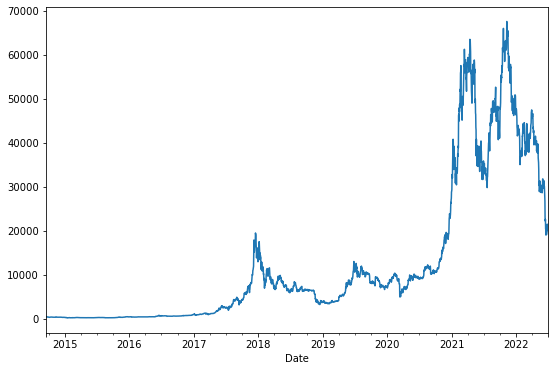

In [29]:
df['Close'].plot(figsize=(9,6))

Corrélation entre les valeurs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999528,0.999112,0.998811,0.998811,0.724008
High,0.999528,1.000000,0.999043,0.999476,0.999476,0.727865
Low,0.999112,0.999043,1.000000,0.999389,0.999389,0.715739
Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Adj Close,0.998811,0.999476,0.999389,1.000000,1.000000,0.722695
Volume,0.724008,0.727865,0.715739,0.722695,0.722695,1.000000


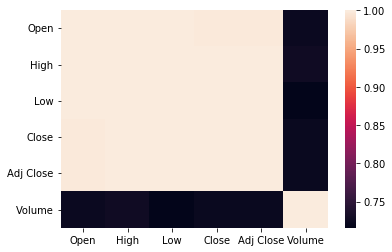

In [30]:
sns.heatmap(df.corr()) 
df.corr()

In [31]:
#  definition des colonnes features et target 

close = df['Close']
volume = df['Volume']

features = volume
target = close
 
df = df[['Close','Volume']]
df.head()

,Close,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [32]:
# regression linéaire simple 
from sklearn import linear_model

x=features.values.reshape(-1,1)
y=target
modele = linear_model.LinearRegression()
modele.fit(x,y)

print(modele.score(x,y) *100)
print("coeff 0 = ", modele.intercept_)
print("coeff 1 = ", modele.coef_)

52.228765305150205
coeff 0 =  3152.102562986869
coeff 1 =  [6.01590305e-07]


Source et collecte des données : https://finance.yahoo.com/quote/BTC-USD/history/

Prix journalier du BTC du 17/09/2014 au 01/07/2022 

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


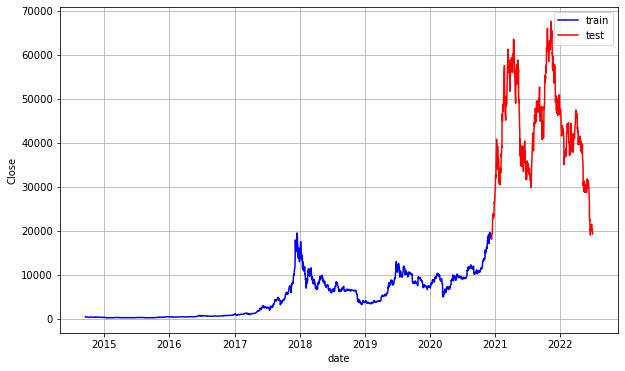

In [33]:
# Train test Split 

to_row = int(len(df)*0.8)

target_train_data = close[0:to_row]
target_test_data = close[to_row:] 

plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(target_train_data,'blue',label='train')
plt.plot(target_test_data,"red",label='test')
# plt.plot(target_test_data,"red",label='Prediction')

plt.legend()





In [37]:
from statsmodels.tsa.stattools import acf,pacf

predictions = []
n_test_obser = len(target_test_data)

# calcul q,p,d du modele ARIMA

acf_q = acf(target_train_data)
pacf_d = pacf(target_train_data)

print(acf_q)
print(pacf_d)

# Entrainement du modele 

model = ARIMA(target_train_data, order = (1,0,0))
res = model.fit()


print(res.summary())

    



[1.         0.99560447 0.99121551 0.98664716 0.98205782 0.97764102
 0.97299436 0.96831895 0.96382437 0.95934499 0.95453029 0.94969379
 0.94497191 0.9403761  0.93596131 0.93123208 0.92634004 0.9218112
 0.91713498 0.91242896 0.90734588 0.90217149 0.89717925 0.89222985
 0.88774426 0.88357829 0.87920779 0.87477355 0.87051175 0.86635647
 0.86229325 0.8580802  0.85388682 0.85015021]
[ 1.00000000e+00  9.96042095e-01 -1.59076462e-03 -2.51624497e-02
 -5.22642929e-03  1.98703978e-02 -3.14994951e-02 -7.28378682e-03
  2.16364948e-02  2.53874372e-04 -4.76397801e-02 -5.05037517e-03
  1.53695646e-02  1.24632776e-02  1.74092357e-02 -4.05618172e-02
 -2.33749754e-02  4.34503555e-02 -2.06820588e-02 -9.47164995e-03
 -4.83106064e-02 -1.09283350e-02  1.66228901e-02  9.57511112e-04
  6.00677872e-02  4.30841415e-02 -3.51346385e-02 -1.69417286e-02
  2.24063739e-02  1.74695151e-02  8.41930635e-03 -2.73094300e-02
  5.36484808e-05  5.34214088e-02]
                               SARIMAX Results                    

/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/saber/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


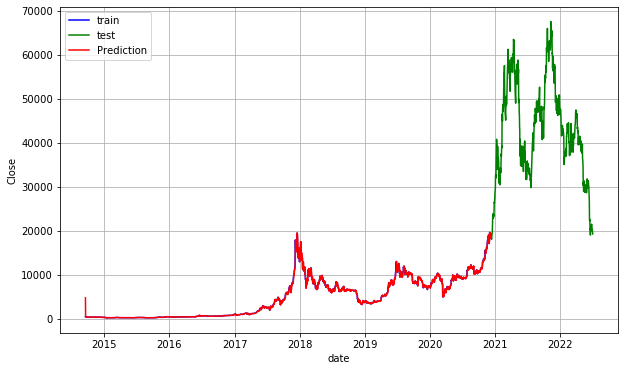

In [35]:
plt.figure(figsize=(10,6))
plt.grid()
plt.xlabel('date')
plt.ylabel('Close')
plt.plot(target_train_data,'blue',label='train')
plt.plot(target_test_data,"green",label='test')
plt.plot(res.predict(),"red",label='Prediction')


